## NWB-Datajoint tutorial 2

**Note: make a copy of this notebook and run the copy to avoid git conflicts in the future**

This is the second in a multi-part tutorial on the NWB-Datajoint pipeline used in Loren Frank's lab, UCSF. It demonstrates how to curate the results of spike sorting.

Finish [tutorial 0](0_intro.ipynb) and [tutorial 1](1_spikesorting.ipynb) before proceeding.

Let's start by importing the `nwb_datajoint` package, along with a few others. 

In [39]:
import os
import numpy as np

import nwb_datajoint as nd

import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)

In [40]:
# We also import a bunch of tables so that we can call them easily
from nwb_datajoint.common import (PositionSource, RawPosition, HeadDir, Speed, LinPos, StateScriptFile, VideoFile,
                                  DataAcquisitionDevice, CameraDevice, Probe,
                                  DIOEvents,
                                  ElectrodeGroup, Electrode, Raw, SampleCount,
                                  LFPSelection, LFP, LFPBandSelection, LFPBand,
                                  SortGroup, SpikeSorting, SpikeSorter, SpikeSorterParameters, SpikeSortingWaveformParameters, SpikeSortingParameters, SpikeSortingMetrics, CuratedSpikeSorting,AutomaticCurationSpikeSorting,AutomaticCurationParameters,AutomaticCurationSpikeSortingParameters,\
                                  UnitInclusionParameters,FirFilter,
                                  IntervalList, SortInterval,
                                  Lab, LabMember, Institution,
                                  BrainRegion,
                                  SensorData,
                                  Session, ExperimenterList,
                                  Subject,
                                  Task, TaskEpoch,
                                  Nwbfile, AnalysisNwbfile, NwbfileKachery, AnalysisNwbfileKachery)
from nwb_datajoint.decoding import MarkParameters, UnitMarkParameters, UnitMarks

In [3]:
# Define the name of the file that you copied and renamed; make sure it's something unique. 
nwb_file_name = 'despereaux20191125.nwb'
filename, file_extension = os.path.splitext(nwb_file_name)
# This is a copy of the original nwb file, except it doesn't contain the raw data (for storage reasons)
nwb_file_name2 = filename + '_' + file_extension

First, make sure that our results are stored in `SpikeSorting` table.

In [41]:
UnitInclusionParameters.drop()

`common_spikesorting`.`unit_inclusion_parameters` (1 tuples)
`decoding_clusterless`.`unit_mark_parameters` (1 tuples)
`decoding_clusterless`.`__unit_marks` (1 tuples)


Proceed? [yes, No]:  yes


Tables dropped.  Restart kernel.


In [4]:
MarkParameters().insert_default_param()
mark_key = MarkParameters.fetch('KEY')[0]

unit_key = (UnitInclusionParameters & {'unit_inclusion_param_name': 'all'}).fetch("KEY")[0]

nwb_file_name = 'despereaux20191125_.nwb'
sort_group_id=1
sort_interval_name = '02_r1'
tmp_key = {'nwb_file_name' : nwb_file_name, 'sort_group_id':sort_group_id, 'sort_interval_name':sort_interval_name}
curated_key = (CuratedSpikeSorting & tmp_key).fetch("KEY")[0]

# combine the keys:
key = dict(curated_key.items() + unit_key.items() + mark_key.items())

TypeError: unsupported operand type(s) for +: 'dict_items' and 'dict_items'

In [32]:
m= UnitMarks().fetch_nwb()[0]

In [33]:
t = m['marks'].timestamps
d = m['marks'].data

In [35]:
d[2,:]

array([-124, -166, -153, -150], dtype=int16)

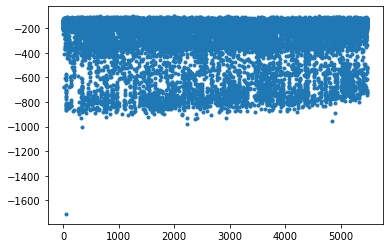

In [36]:
from matplotlib import pyplot as plt
plt.plot(t-t[0], np.amin(d, axis=1), '.')


AnalysisNwbFile

In [36]:
import matplotlib.pyplot as plt

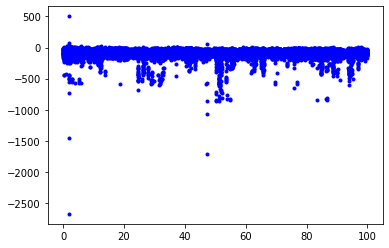

In [212]:
plt.plot(timestamps[include] - timestamps[0], marks[include,:], 'b.')

In [215]:
curation_key = CuratedSpikeSorting().fetch1("KEY")

In [234]:
SpikeSorting()

nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,sort_interval_name name for this interval,analysis_file_name name of the file,units_object_id Object ID for the units in NWB file,time_of_sort This is when the sort was done,curation_feed_uri Labbox-ephys feed for curation
despereaux20191125_.nwb,1,mountainsort4,franklab_tetrode_hippocampus_30KHz,02_r1,despereaux20191125_XDHWMMOLUZ.nwb,3ac6946b-149a-49b7-a429-66bdc1b67ed8,1623906086,workspace://feaad146096c8a917756184117374f8cf30f5cc8cf86273b5895837e8e9be3cf?label=despereaux20191125_XDHWMMOLUZ.nwb
despereaux20191125_.nwb,11,mountainsort4,franklab_tetrode_hippocampus_30KHz,02_r1,despereaux20191125_JSF9MG7JOF.nwb,c0b4b63c-76d4-4c0b-ae80-856d9cf2c41c,1623909473,workspace://848273a9420636e2efc32c461b201348b28282d577506f7003c9703b3cf15b12?label=despereaux20191125_JSF9MG7JOF.nwb
despereaux20191125_.nwb,11,mountainsort4,franklab_tetrode_small_filter_chunk_30KHz,02_r1,despereaux20191125_ONQGRALFCL.nwb,7ee25ea2-1695-42f5-97c3-7cbf3aeec4c0,1623912121,workspace://acd9b30b53761a7e96a53e1ca2614aef9b31305a9d975c6bc7e32c55d3ec53bb?label=despereaux20191125_ONQGRALFCL.nwb


### Web app

In addition to this Jupyter widget, one can access it via a web application as well. The same recording and sorting pairs can be accessed via both methods.

In [24]:
(SpikeSorting() & {'sort_group_id' : 11}).delete()

Deleting 1 rows from `common_spikesorting`.`__spike_sorting`


Commit deletes? [yes, No]:  yes


Deletes committed.


1

In [26]:
AnalysisNwbfile().cleanup(delete_files=True)

0it [00:00, ?it/s]


In [7]:
RawPosition()

/home/loren/anaconda3/envs/nwb_datajoint/lib/python3.8/site-packages/datajoint/connection.py:304: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


nwb_file_name name of the NWB file,raw_position_object_id the object id of the data in the NWB file,interval_list_name descriptive name of this interval list
beans20190718_.nwb,cd1f0acc-412d-4188-bf7d-b277aee5af22,pos 0 valid times
beans20190718_jhbak_.nwb,cd1f0acc-412d-4188-bf7d-b277aee5af22,pos 0 valid times
chimi20200216_.nwb,92dc9a15-5328-4cae-8d4d-f071c6c5bf92,pos 0 valid times
despereaux20191125_.nwb,6f75a48b-c62a-4b62-9113-d1e289a0d8dd,pos 0 valid times


In [8]:
(RawPosition() & {'nwb_file_name': 'despereaux20191125_.nwb'}).delete()

Deleting 1 rows from `common_behav`.`_raw_position`


Commit deletes? [yes, No]:  yes


Deletes committed.


1

In [3]:

PositionSource().get_nwbf_position_data('despereaux20191125_.nwb')

Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz


In [4]:
RawPosition.populate()

Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz


MissingAttributeError: Field 'interval_list_name' doesn't have a default value

In [5]:
PositionSource()

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,"source source of data; current options are ""trodes"" and ""dlc"" (deep lab cut",import_file_name path to import file if importing position data
despereaux20191125_.nwb,pos 0 valid times,trodes,
despereaux20191125_.nwb,pos 1 valid times,trodes,
despereaux20191125_.nwb,pos 2 valid times,trodes,
despereaux20191125_.nwb,pos 3 valid times,trodes,
despereaux20191125_.nwb,pos 4 valid times,trodes,
despereaux20191125_.nwb,pos 5 valid times,trodes,
despereaux20191125_.nwb,pos 6 valid times,trodes,
